# K-means algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import color

In [2]:
def importImage(imdir):
    
    im_array = plt.imread(imdir)
    im_array = (im_array * 255).astype(np.int64)
    im_array = im_array[:,:,:3]

    height = np.shape(im_array)[0]
    width = np.shape(im_array)[1]
    
    channels = np.shape(im_array)[2]
    
    return im_array, width, height, channels

In [3]:
image_dir = "./triangles.png"
image, width, height, channels = importImage(image_dir)

data = np.reshape(image, (height*width, 3))

#### **Actual test**

In [4]:
clusters, means = color.kmeans(4, 5, data)
dominantColor = color.getDominant(clusters, means)

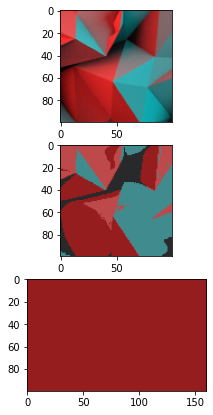

In [5]:
out = np.reshape( clusters, (height, width, 3) )

block = np.ones((100,160,3), dtype=np.uint8)*dominantColor

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,7))
ax1.imshow(image, aspect = "equal")
ax2.imshow(out, aspect = "equal")
ax3.imshow(block, aspect = "equal")

#### **Efficiency test**

In [6]:
%%timeit
clusters, means = color.kmeans(4, 5, data)
dominantColor = color.getDominant(clusters, means)

33.8 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
